# Task 2c Visualization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [3]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# Read data
img1 = cv2.imread("data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

## Compute and Visualize Matches

torch.Size([1, 2])


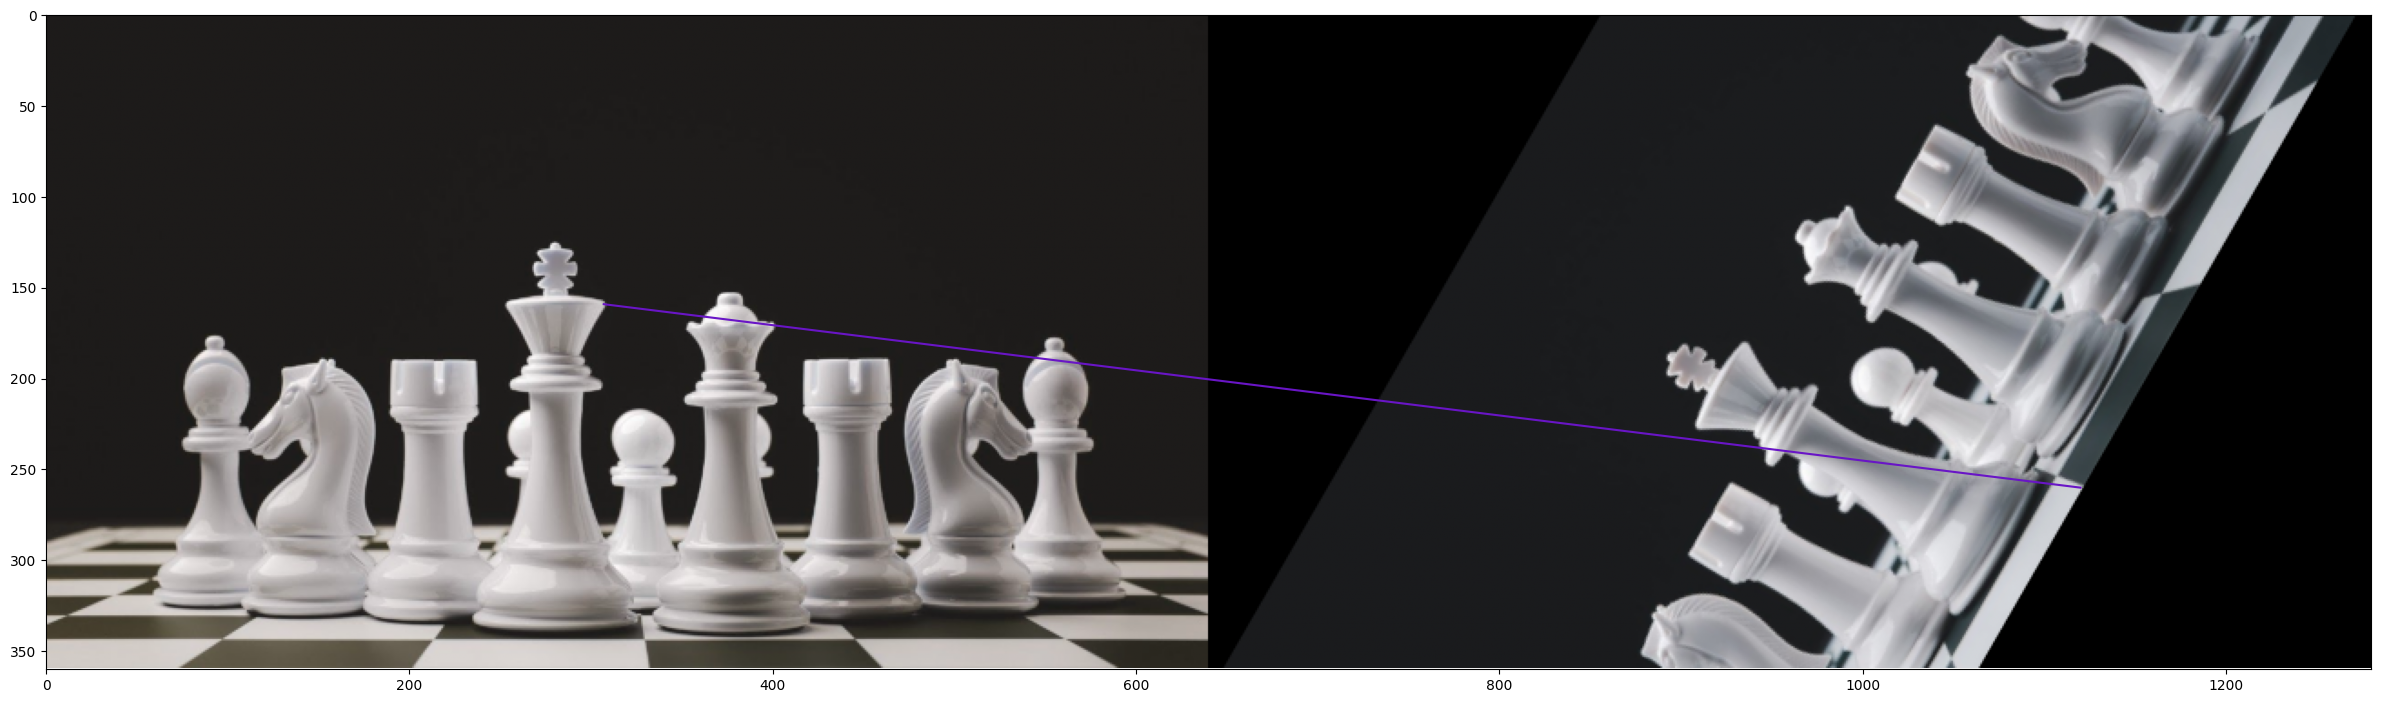

In [49]:
from rhog import RHOG

hog = RHOG() 

img1 = cv2.imread("data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

# Fields in keypoints from SIFT detector:
# x, y, angle, octave, response, size
keypoints1 = torch.tensor(np.loadtxt('task2c/keypoints1.txt'), device=device)
keypoints2 = torch.tensor(np.loadtxt('task2c/keypoints2.txt'), device=device)

hog = RHOG()
desc1, keypoints1 = hog.compute_descriptors(torch.tensor(gray1, device=device), keypoints1)
desc2, keypoints2 = hog.compute_descriptors(torch.tensor(gray2, device=device), keypoints2)

torch.Size([65, 2])


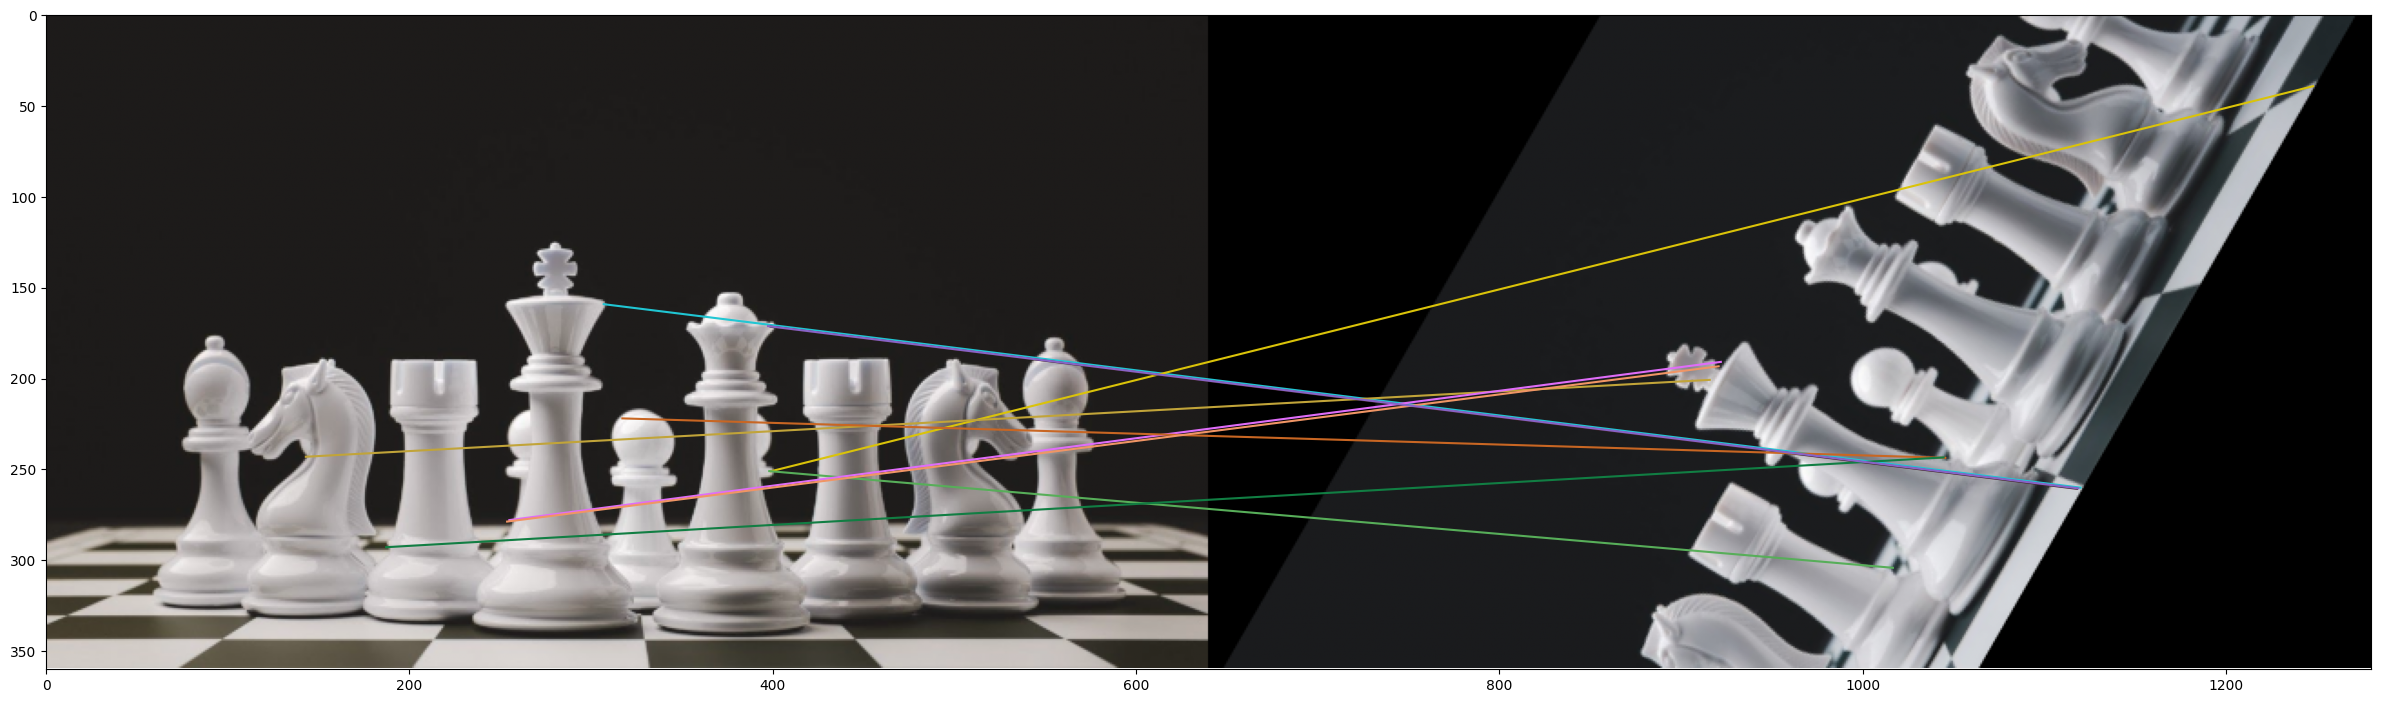

In [56]:
from skimage.feature import plot_matches
import matplotlib.pyplot as plt
import cv2

from task2a.match import match
matches = match(
        descriptors1=desc1,
        descriptors2=desc2,
        device=device,
        dist="euclidean",
        ratio=0.95,
        threshold=100000, # Adjust value 
    )
print(matches.shape)
fig, axs = plt.subplots(figsize=(30.0, 20.0))
k = 10
plot_matches(
    axs,
    img1,
    img2,
    keypoints1[:,0:2].cpu(),
    keypoints2[:,0:2].cpu(),
    matches[:k, :],
    alignment="horizontal",
    only_matches=True,
)

plt.show()